# Capítulo 6 - Método Cross-Entropy


Você pode rodar este notebook localmente ou no Colab. Para abrir diretamente no Colab, basta clicar no link abaixo.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pablo-sampaio/rl_facil/blob/main/cap06/cap06-main.ipynb) 

## 1. Configurações Iniciais

### Para Rodar no Colab

Nesta versão, você pode rodar a célula abaixo, mesmo sem estar no Colab.

In [1]:
import sys

if 'google.colab' in sys.modules:
    !pip install gym
    !pip install gym[box2d]
    !pip install optuna

    # para salvar videos
    !apt-get install -y xvfb x11-utils
    !pip install pyvirtualdisplay==0.2.*

    from pyvirtualdisplay import Display
    #global display
    display = Display(visible=False, size=(1400, 900))
    _ = display.start()

    #!apt-get install ffmpeg

    !git clone https://github.com/pablo-sampaio/rl_facil

    !mv /content/rl_facil/cap04/* /content/
    !mv /content/rl_facil/cap05/* /content/
    !mv /content/rl_facil/cap06/* /content/

!mkdir results

from IPython.display import clear_output

clear_output()

### Configurações para Video

In [2]:
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from base64 import b64encode

def render_mp4(videopath: str) -> str:
  """
  Gets a string containing a b4-encoded version of the MP4 video
  at the specified path.
  """
  mp4 = open(videopath, 'rb').read()
  base64_encoded_mp4 = b64encode(mp4).decode()
  return f'<video width=400 controls><source src="data:video/mp4;' \
         f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'

### Imports Principais

Algoritmos, ambientes e outros módulos.

In [3]:
import gym
import numpy as np
import optuna

from util_experiments import repeated_exec
from util_plot import plot_result, plot_multiple_results

#from montecarlo_v2 import run_montecarlo2
#from qlearning import run_qlearning
#from expected_sarsa import run_expected_sarsa
from models_torch import test_deterministic_policy
from crossentropy_method import run_crossentropy_method

## 2. Rodando o Método Cross-Entropy

d:\Pablo\Documents\Projects\pablo-sampaio\rl_facil\cap06\models_torch.py:54: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\Users\builder\tkoch\workspace\pytorch\pytorch_1647970138273\work\torch\csrc\utils\tensor_new.cpp:201.)
  obs_tensor = torch.FloatTensor([observation])


- episode 10: loss=0.685, reward_mean=27.50, reward_bound=66.19
- episode 20: loss=0.670, reward_mean=30.90, reward_bound=78.38
- episode 30: loss=0.672, reward_mean=34.20, reward_bound=76.14
- episode 40: loss=0.652, reward_mean=33.80, reward_bound=72.89
- episode 50: loss=0.658, reward_mean=33.80, reward_bound=47.00
- episode 60: loss=0.639, reward_mean=34.80, reward_bound=72.38
- episode 70: loss=0.632, reward_mean=27.80, reward_bound=47.87
- episode 80: loss=0.627, reward_mean=41.80, reward_bound=73.84
- episode 90: loss=0.629, reward_mean=40.40, reward_bound=78.16
- episode 100: loss=0.628, reward_mean=45.30, reward_bound=65.78
- episode 110: loss=0.608, reward_mean=54.40, reward_bound=77.87
- episode 120: loss=0.617, reward_mean=59.50, reward_bound=101.87
- episode 130: loss=0.596, reward_mean=38.50, reward_bound=58.87
- episode 140: loss=0.584, reward_mean=54.20, reward_bound=108.16
- episode 150: loss=0.661, reward_mean=49.20, reward_bound=78.78
- episode 160: loss=0.603, rewar

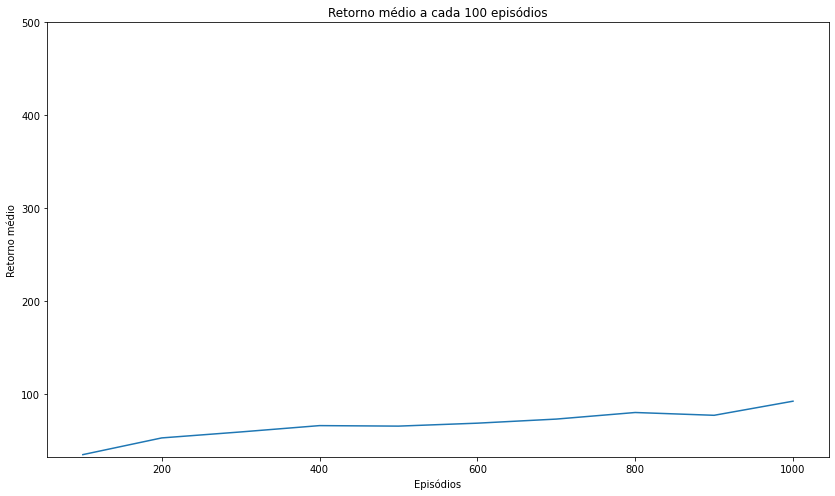

Nenhum arquivo salvo.


In [5]:
#ENV_NAME = "CartPole-v1"
ENV_NAME = "Acrobot-v1"
#ENV_NAME = "MountainCar-v0"
#ENV_NAME = "LunarLander-v2"
ENV = gym.make(ENV_NAME)

EPISODES = 1000        # total de episódios
BATCH_SIZE = 10        # quantidade de episódios executados por época de treinamento
PERCENT_BEST = 0.2     # percentual dos episódios (do batch) que serão selecionados

returns, policy = run_crossentropy_method(ENV, EPISODES, BATCH_SIZE, PERCENT_BEST)

print("Últimos resultados: media =", np.mean(returns[-20:]), ", desvio padrao =", np.std(returns[-20:]))

# Salva em arquivo ou exibe um gráfico episódios x retornos (não descontados)
filename = f"results/crossentropy-{ENV_NAME.lower()[0:8]}-ep{EPISODES}-batch{BATCH_SIZE}-best{PERCENT_BEST}.png"
plot_result(returns, 500, None)


In [6]:
# Faz alguns testes com o modelo e salva vídeo em arquivo
video = VideoRecorder(ENV, "politica-treinada.mp4")
test_policy(ENV, policy, 5, render=False, video=video)

DependencyNotInstalled: Found neither the ffmpeg nor avconv executables. On OS X, you can install ffmpeg via `brew install ffmpeg`. On most Ubuntu variants, `sudo apt-get install ffmpeg` should do it. On Ubuntu 14.04, however, you'll need to install avconv with `sudo apt-get install libav-tools`. Alternatively, please install imageio-ffmpeg with `pip install imageio-ffmpeg`

: 

## 3. Experimentos


### 3.1 Parâmetros do Cross-Entropy

Abaixo, mostramos experimentos variando os dois parâmetros mais diretos do método:
- o tamanho de batch (de episódios)
- a proporção dos episódios selecionados

In [5]:
NUM_EPISODES = 1000

env = gym.make("CartPole-v1")

results = []

for batch_size in [5, 10, 15, 20]:
    results = []
    for proportion in [1/5.0, 2/5.0, 3/5.0]:
        results.append( repeated_exec(5, f"CrossEntropy ({batch_size},{proportion:.3f})", run_crossentropy_method, env, NUM_EPISODES, batch_size, proportion) )
    plot_multiple_results(results, cumulative=False, x_log_scale=False)

#plot_multiple_results(results, cumulative=False, x_log_scale=False)


Executing <function run_crossentropy_method at 0x00000204D9DB3550>:


  0%|          | 0/1 [00:00<?, ?it/s]

- episode 10: loss=0.691, reward_mean=21.20, reward_bound=39.86
- episode 20: loss=0.682, reward_mean=19.40, reward_bound=23.98
- episode 30: loss=0.660, reward_mean=27.80, reward_bound=63.72
- episode 40: loss=0.746, reward_mean=18.00, reward_bound=24.99
- episode 50: loss=0.654, reward_mean=33.80, reward_bound=52.93
- episode 60: loss=0.710, reward_mean=41.40, reward_bound=71.99
- episode 70: loss=0.690, reward_mean=29.80, reward_bound=38.96
- episode 80: loss=0.656, reward_mean=29.80, reward_bound=65.75
- episode 90: loss=0.649, reward_mean=31.40, reward_bound=47.97
- episode 100: loss=0.656, reward_mean=32.80, reward_bound=46.94
- episode 110: loss=0.708, reward_mean=36.00, reward_bound=45.93
- episode 120: loss=0.643, reward_mean=30.20, reward_bound=36.98
- episode 130: loss=0.663, reward_mean=35.20, reward_bound=79.64
- episode 140: loss=0.643, reward_mean=33.00, reward_bound=48.94
- episode 150: loss=0.635, reward_mean=23.60, reward_bound=47.79
- episode 160: loss=0.633, reward_

100%|██████████| 1/1 [00:30<00:00, 30.17s/it]

- episode 2000: loss=0.554, reward_mean=500.00, reward_bound=500.00
  (1 executions of CrossEntropy (5,0.200) finished in 30.17 secs)


FileNotFoundError: [Errno 2] No such file or directory: 'results/_CartPoleEnv_CartPole-v1__-CrossEntropy (5,0.200)-execs1.npy'

### 3.2 Outros Experimentos

Você também pode variar todos os parâmetros da rede neural: quantidade de camadas, taxa de aprendizagem, etc.

Executing <function run_crossentropy_method at 0x000002674BF89430>:


  0%|          | 0/3 [00:00<?, ?it/s]d:\Pablo\Documents\Projects\pablo-sampaio\rl_facil\cap06\models_torch.py:54: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\Users\builder\tkoch\workspace\pytorch\pytorch_1647970138273\work\torch\csrc\utils\tensor_new.cpp:201.)
  obs_tensor = torch.FloatTensor([observation])


- episode 5: loss=0.714, reward_mean=20.60, reward_bound=27.99
- episode 10: loss=0.690, reward_mean=23.40, reward_bound=39.89
- episode 15: loss=0.678, reward_mean=33.40, reward_bound=60.99
- episode 20: loss=0.666, reward_mean=27.60, reward_bound=48.86
- episode 25: loss=0.667, reward_mean=31.20, reward_bound=40.99
- episode 30: loss=0.653, reward_mean=31.40, reward_bound=46.94
- episode 35: loss=0.659, reward_mean=30.00, reward_bound=43.90
- episode 40: loss=0.646, reward_mean=51.80, reward_bound=104.66
- episode 45: loss=0.625, reward_mean=36.20, reward_bound=51.98
- episode 50: loss=0.635, reward_mean=39.40, reward_bound=85.70
- episode 55: loss=0.633, reward_mean=42.20, reward_bound=52.97
- episode 60: loss=0.640, reward_mean=67.00, reward_bound=94.88
- episode 65: loss=0.628, reward_mean=59.00, reward_bound=83.85
- episode 70: loss=0.619, reward_mean=42.20, reward_bound=55.97
- episode 75: loss=0.641, reward_mean=40.80, reward_bound=72.74
- episode 80: loss=0.594, reward_mean=60

 33%|███▎      | 1/3 [00:41<01:22, 41.25s/it]

- episode 1000: loss=0.510, reward_mean=500.00, reward_bound=500.00
- episode 5: loss=0.507, reward_mean=469.20, reward_bound=500.00
- episode 10: loss=0.515, reward_mean=500.00, reward_bound=500.00
- episode 15: loss=0.512, reward_mean=500.00, reward_bound=500.00
- episode 20: loss=0.499, reward_mean=500.00, reward_bound=500.00
- episode 25: loss=0.513, reward_mean=500.00, reward_bound=500.00
- episode 30: loss=0.520, reward_mean=500.00, reward_bound=500.00
- episode 35: loss=0.518, reward_mean=500.00, reward_bound=500.00
- episode 40: loss=0.520, reward_mean=500.00, reward_bound=500.00
- episode 45: loss=0.518, reward_mean=500.00, reward_bound=500.00
- episode 50: loss=0.516, reward_mean=500.00, reward_bound=500.00
- episode 55: loss=0.529, reward_mean=464.20, reward_bound=500.00
- episode 60: loss=0.518, reward_mean=489.20, reward_bound=500.00
- episode 65: loss=0.518, reward_mean=500.00, reward_bound=500.00
- episode 70: loss=0.516, reward_mean=454.00, reward_bound=500.00
- episode

 67%|██████▋   | 2/3 [02:12<01:10, 70.72s/it]

- episode 1000: loss=0.527, reward_mean=500.00, reward_bound=500.00
- episode 5: loss=0.533, reward_mean=500.00, reward_bound=500.00
- episode 10: loss=0.528, reward_mean=500.00, reward_bound=500.00
- episode 15: loss=0.529, reward_mean=500.00, reward_bound=500.00
- episode 20: loss=0.532, reward_mean=500.00, reward_bound=500.00
- episode 25: loss=0.532, reward_mean=500.00, reward_bound=500.00
- episode 30: loss=0.530, reward_mean=500.00, reward_bound=500.00
- episode 35: loss=0.532, reward_mean=500.00, reward_bound=500.00
- episode 40: loss=0.529, reward_mean=500.00, reward_bound=500.00
- episode 45: loss=0.541, reward_mean=417.00, reward_bound=500.00
- episode 50: loss=0.531, reward_mean=500.00, reward_bound=500.00
- episode 55: loss=0.534, reward_mean=500.00, reward_bound=500.00
- episode 60: loss=0.534, reward_mean=500.00, reward_bound=500.00
- episode 65: loss=0.532, reward_mean=441.00, reward_bound=500.00
- episode 70: loss=0.530, reward_mean=500.00, reward_bound=500.00
- episode

100%|██████████| 3/3 [03:40<00:00, 73.34s/it]

- episode 1000: loss=0.489, reward_mean=500.00, reward_bound=500.00
  (3 executions of CrossEntropy (5,0.200) finished in 220.23 secs)


Loading results from results/_CartPoleEnv_CartPole-v1__-CrossEntropy (5,0.200)-execs3.npy
Loading results from results/_CartPoleEnv_CartPole-v1__-CrossEntropy (5,0.200)-execs3.npy
Loading results from results/_CartPoleEnv_CartPole-v1__-CrossEntropy (5,0.200)-execs3.npy


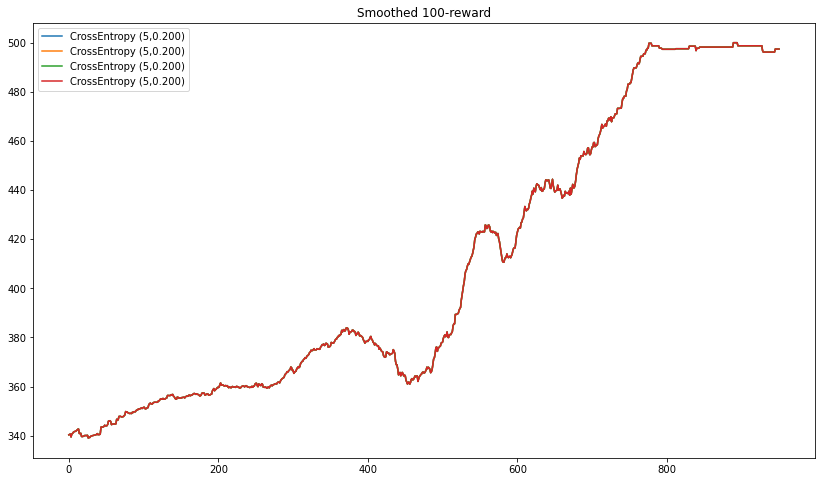

Summary for CrossEntropy (5,0.200)
 - sum rewards (all episodes): 409705.3333333333

Summary for CrossEntropy (5,0.200)
 - sum rewards (all episodes): 409705.3333333333

Summary for CrossEntropy (5,0.200)
 - sum rewards (all episodes): 409705.3333333333

Summary for CrossEntropy (5,0.200)
 - sum rewards (all episodes): 409705.3333333333



In [4]:
from models_torch import PolicyModelCrossentropy

NUM_EPISODES = 1000
batch_size = 5
proportion = 0.2

env = gym.make("CartPole-v1")

results = []

for hidden_layer_size in [16, 64, 256]:
    policy_model = PolicyModelCrossentropy(env.observation_space.shape[0], [64], env.action_space.n, lr=0.01)
    results.append( repeated_exec(3, f"CrossEntropy (hnodes={hidden_layer_size})", run_crossentropy_method, env, NUM_EPISODES, batch_size, proportion, policy_model) )

plot_multiple_results(results, cumulative=False, x_log_scale=False)